In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

***

In [148]:

df = pd.read_csv('progeny_stats_11nov20_original.csv')
df = df.rename(columns={'Unnamed: 0': 'stallion'}).set_index('stallion')
df.sample()

,Flat_win_runners,Flat_wins,Flat_runs,Flat_earnings,Turf_win_runners,Turf_wins,Turf_runs,Turf_earnings,All-weather_win_runners,All-weather_wins,...,Firm_earnings,age,sire,dam,dam_sire,stud_fee,total_starts,total_earnings,top_rpr,sire_comments
stallion,,,,,,,,,,,,,,,,,,,,,
Youmzain,11/24,17.0,191.0,"£251,088",7/20,11.0,144.0,"£214,072",5/15,6.0,...,"£1,040",18yo:,Sinndar right,Sadima right,Sadler's Wells right,Private,32,"£3,394,269",128,"top middle-distance horse at 3-7, three-time A..."


* Getting rid of £ and commas in earnings columns
* Fill nan with 0
* Convert to integer

In [149]:
for col in df.columns:
    if 'earnings' in col:
        df[col] = df[col].str.replace('£', '').str.replace(',', '').replace('—', 0).fillna(0).astype(int)
df.sample()

,Flat_win_runners,Flat_wins,Flat_runs,Flat_earnings,Turf_win_runners,Turf_wins,Turf_runs,Turf_earnings,All-weather_win_runners,All-weather_wins,...,Firm_earnings,age,sire,dam,dam_sire,stud_fee,total_starts,total_earnings,top_rpr,sire_comments
stallion,,,,,,,,,,,,,,,,,,,,,
Cityscape,40/97,99.0,1002.0,1096658,31/88,59.0,640.0,819059,21/75,40.0,...,3482,15yo:,Selkirk,Tantina,Distant View,"£4,000",23,2992356,126,"1m winner at 2, inc Group 1 2nd; high-class fr..."


***
Processing on stud fee column

In [150]:
df.stud_fee = df.stud_fee.str.replace('£', '') \
            .str.replace('€', '') \
            .str.replace(',', '') 
            
df = df.loc[df.stud_fee != 'Private']
df.stud_fee = df.stud_fee.astype(int)
df.sample()

,Flat_win_runners,Flat_wins,Flat_runs,Flat_earnings,Turf_win_runners,Turf_wins,Turf_runs,Turf_earnings,All-weather_win_runners,All-weather_wins,...,Firm_earnings,age,sire,dam,dam_sire,stud_fee,total_starts,total_earnings,top_rpr,sire_comments
stallion,,,,,,,,,,,,,,,,,,,,,
Due Diligence,37/90,88.0,715.0,899978,23/76,52.0,403.0,605585,22/73,36.0,...,7502,10yo:,War Front,Bema,Pulpit,6000,9,202818,116,5f winner at 2 in US; high-class sprinter at 3...


***

In [151]:
# take each column of bn_features
# check if the proportion of NaN is greater than 0.3
# this is to make sure I am not losing too much information by removing all NaNs
# if not, then add to a new data frame
#df_features=df.drop(["stud_fee"], axis=1)
#df_target=df['stud_fee']

df_list=[]
for i in list(df):
    nan = df[i].isna().sum()
    total = len(df[i])
    result=nan/total
    if result <= 0.2:
        df_list.append(i)

df1=df[df_list]
    #merge with big data frame according to the authority (is that left stitch?)
#    bn_new=pd.merge(bn_new, df2, how='left')
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, Acclamation to Zoffany
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flat_win_runners          93 non-null     object 
 1   Flat_wins                 93 non-null     float64
 2   Flat_runs                 93 non-null     float64
 3   Flat_earnings             94 non-null     int64  
 4   Turf_win_runners          93 non-null     object 
 5   Turf_wins                 93 non-null     float64
 6   Turf_runs                 93 non-null     float64
 7   Turf_earnings             94 non-null     int64  
 8   All-weather_win_runners   93 non-null     object 
 9   All-weather_wins          93 non-null     float64
 10  All-weather_runs          93 non-null     float64
 11  All-weather_earnings      94 non-null     int64  
 12  Jumps_win_runners         76 non-null     object 
 13  Jumps_wins                76 non-null     float64
 14  Ju

In [152]:
df1 = df1.dropna()

***
### Now some processing to clean/add columns

In [153]:
colnames = list(df1.columns)
win_run = []
for i, item in enumerate(colnames):
    ph = colnames[i]
    if '_win_runners' in ph:
        win_run.append(ph)
    

In [154]:
for name in win_run:
    df1[name+str('_win')], df1[name+str('_run')] = df1[name].str.split('/', 1).str
    df1[name+str('_win')] = df1[name+str('_win')].astype(float)
    df1[name+str('_run')] = df1[name+str('_run')].astype(float)
    df1.drop(name, axis=1)
    df1[name] = df1[name+str('_win')] / df1[name+str('_run')]
    df1 = df1.drop([name+str('_win'),name+str('_run')], axis=1)

In [155]:
colnames = list(df1.columns)
earnings = []
runs = []
wins = []
for i, item in enumerate(colnames):
    ph = colnames[i]
    if '_runs' in ph:
        runs.append(ph)
    elif '_earnings'in ph:
        earnings.append(ph)
    elif '_wins' in ph:
        wins.append(ph)

earnings=earnings[:-1]

In [156]:
for index, name in enumerate(runs):
    earnings_idx = name.split('_')[0] + '_earnings'
    df1[earnings_idx + str('_p_run')] = df1[earnings_idx] / df1[runs[index]]
    df1 = df1.drop(earnings[index], axis=1)
    df1 = df1.drop(runs[index], axis=1)
    df1 = df1.drop(wins[index], axis=1)

In [157]:
df1.columns

Index(['Flat_win_runners', 'Turf_win_runners', 'All-weather_win_runners',
       'Jumps_win_runners', 'Hurdles_win_runners', '2yo_win_runners',
       'First Crop_win_runners', '5-6f_win_runners', '7-9f_win_runners',
       '10-11f_win_runners', '12-13f_win_runners', 'Heavy_win_runners',
       'Soft_win_runners', 'Gd-sft_win_runners', 'Gd-sft_earnings',
       'Good_win_runners', 'Good_earnings', 'Gd-fm_win_runners',
       'Gd-fm_earnings', 'Firm_win_runners', 'Firm_earnings', 'age', 'sire',
       'dam', 'dam_sire', 'stud_fee', 'total_starts', 'total_earnings',
       'top_rpr', 'sire_comments', 'Flat_earnings_p_run',
       'Turf_earnings_p_run', 'All-weather_earnings_p_run',
       'Jumps_earnings_p_run', 'Hurdles_earnings_p_run', '2yo_earnings_p_run',
       'First Crop_earnings_p_run', '5-6f_earnings_p_run',
       '7-9f_earnings_p_run', '10-11f_earnings_p_run', '12-13f_earnings_p_run',
       'Heavy_earnings_p_run', 'Soft_earnings_p_run', 'Gd-sft_earnings_p_run',
       'Good_e

<AxesSubplot:>

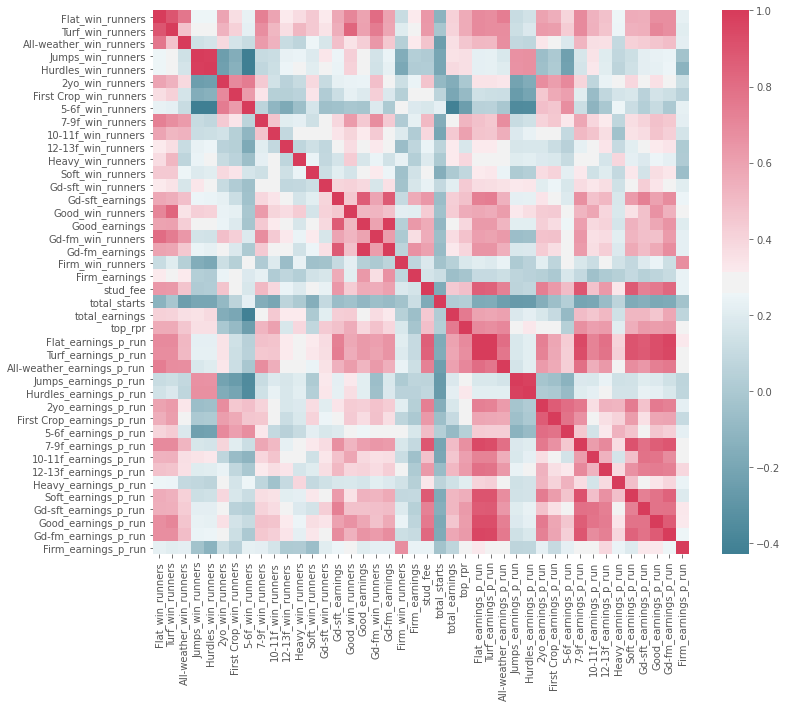

In [158]:
correlations=df1.corr()
correlations.head()

cmap = sns.diverging_palette(220, 5, as_cmap=True)

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlations, cmap=cmap)

<AxesSubplot:xlabel='Flat_earnings_p_run', ylabel='stud_fee'>

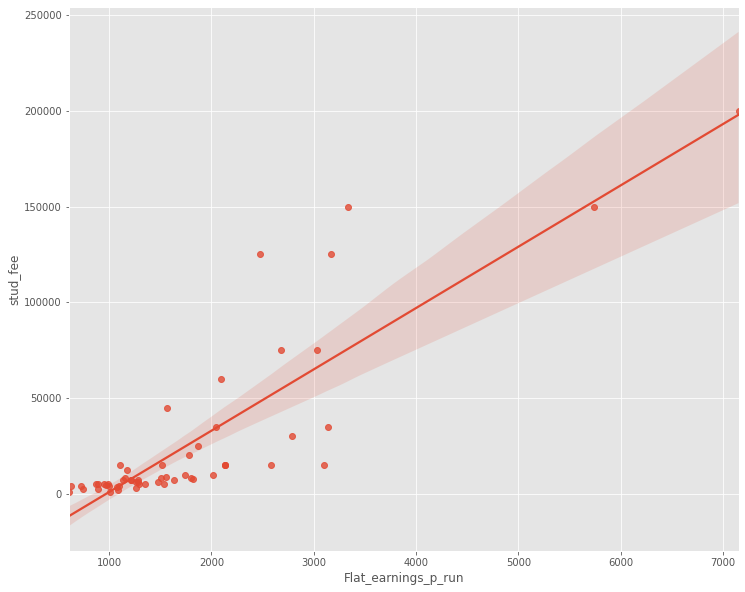

In [159]:
sns.regplot(data=df1, x='Flat_earnings_p_run', y='stud_fee')

In [165]:
df1[["Flat_earnings_p_run", 'stud_fee']].sort_values(by='Flat_earnings_p_run')

,Flat_earnings_p_run,stud_fee
stallion,,
Cockney Rebel,606.740406,1000
Outstrip,621.926890,4000
Cappella Sansevero,719.855263,4000
Swiss Spirit,746.047685,2500
Buratino,868.364742,5000
Elusive Pimpernel,889.280116,2500
Gregorian,889.866743,5000
Adaay,953.420058,5000
Mukhadram,969.672889,4500


In [165]:
np.exp(-0.4)

0.6703200460356393

In [166]:
df2[df2.stud_fee < 8]

,Flat_win_runners,Turf_win_runners,All-weather_win_runners,2_win_runners,5-6f_win_runners,7-9f_win_runners,10-11f_win_runners,Heavy_win_runners,Soft_win_runners,Gd-sft_win_runners,...,All-weather_earningsp_run,2_earningsp_run,5-6f_earningsp_run,7-9f_earningsp_run,Heavy_earningsp_run,Soft_earningsp_run,Gd-sft_earningsp_run,Good_earningsp_run,Gd-fm_earningsp_run,total_earningsp_run
Elusive Pimpernel,-0.993252,-1.216395,-1.757858,-1.386294,-1.791759,-1.034074,-2.564949,-2.351375,-1.642228,-1.540445,...,6.172496,6.481042,7.002225,7.036804,6.929501,7.871984,6.423635,8.602814,6.168850,7.693283
Haatef,-0.502092,-0.883501,-0.944462,-0.932820,-0.969401,-0.869038,-2.197225,-1.897120,-2.261763,-2.268684,...,6.591855,7.021030,6.904295,6.714259,6.346582,7.873425,6.029081,7.721152,7.185885,6.247464
Pastoral Pursuits,-0.709586,-0.815250,-1.158109,-1.043804,-0.833599,-1.358123,-1.900959,-1.683546,-1.462834,-1.662979,...,6.435217,6.986346,7.052498,6.606440,5.937829,8.529077,7.249276,7.729363,7.099624,5.393008
Captain Gerrard,-0.912895,-1.349927,-1.241112,-1.411828,-1.040202,-1.791759,-1.845827,-3.178054,-1.974081,-2.209495,...,6.150760,6.289619,6.697169,6.303379,5.651742,8.608821,6.453705,7.411636,7.238905,5.760430
Phoenix Reach,-1.386294,-1.504077,-1.719786,-2.061423,-2.079442,-1.919593,-1.584120,-1.519826,-1.749200,-2.100061,...,5.857973,7.150576,6.052897,6.991407,6.530970,8.245126,6.835417,7.696936,6.057090,9.314540


In [41]:
df1[df1['7-9f_earningsp_run']>2700]

,Flat_win_runners,Turf_win_runners,All-weather_win_runners,2_win_runners,5-6f_win_runners,7-9f_win_runners,10-11f_win_runners,Heavy_win_runners,Soft_win_runners,Gd-sft_win_runners,...,All-weather_earningsp_run,2_earningsp_run,5-6f_earningsp_run,7-9f_earningsp_run,Heavy_earningsp_run,Soft_earningsp_run,Gd-sft_earningsp_run,Good_earningsp_run,Gd-fm_earningsp_run,total_earningsp_run
Lope De Vega,0.577465,0.502439,0.410448,0.333333,0.326087,0.476440,0.364706,0.160000,0.225490,0.247191,...,1618.187500,2449.234136,1963.600660,3309.317713,620.169355,12446.230769,3675.639175,6366.346939,3433.405333,2727.677003
Fastnet Rock,0.591912,0.490119,0.370968,0.287671,0.329114,0.424370,0.271186,0.235294,0.200000,0.244898,...,973.022880,2389.487685,2918.049505,2962.544845,380.230624,9677.923077,5208.980861,12911.895833,4032.994361,951.812109
Farhh,0.516129,0.413793,0.333333,0.280000,0.090909,0.428571,0.153846,0.333333,0.428571,0.117647,...,2013.166667,2170.312500,482.875000,2840.941176,1135.240000,3665.777778,10548.250000,22419.409091,7081.612903,28258.553191
Frankel,0.650000,0.600000,0.345455,0.465753,0.576923,0.495050,0.378788,0.214286,0.300000,0.333333,...,2434.396040,4656.702381,5983.592593,8366.134969,982.708955,59344.578947,11033.560976,18079.908046,16596.076923,14277.628571
Dubawi,0.654206,0.567388,0.390000,0.416300,0.357466,0.512998,0.416961,0.193548,0.299674,0.277259,...,1494.849462,2304.354469,1937.828179,3763.968627,1052.491031,21136.729032,5079.695586,10290.241221,5949.016985,517.264053


In [87]:
df1[df1.sire =='Pivotal']

,Flat_win_runners,Turf_win_runners,All-weather_win_runners,2_win_runners,5-6f_win_runners,7-9f_win_runners,10-11f_win_runners,Heavy_win_runners,Soft_win_runners,Gd-sft_win_runners,...,2_earningsp_run,5-6f_earningsp_run,7-9f_earningsp_run,Heavy_earningsp_run,Soft_earningsp_run,Gd-sft_earningsp_run,Good_earningsp_run,Gd-fm_earningsp_run,total_earningsp_run,log_stud_fee
Farhh,0.516129,0.413793,0.333333,0.28,0.090909,0.428571,0.153846,0.333333,0.428571,0.117647,...,2170.3125,482.875,2840.941176,1135.24,3665.777778,10548.25,22419.409091,7081.612903,28258.553191,9.21034


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Elusive Pimpernel to Sir Percy
Data columns (total 33 columns):
Flat_win_runners             52 non-null float64
Turf_win_runners             52 non-null float64
All-weather_win_runners      52 non-null float64
Jumps_win_runners            52 non-null float64
Hurdles_win_runners          52 non-null float64
2_win_runners                52 non-null float64
5-6f_win_runners             52 non-null float64
7-9f_win_runners             52 non-null float64
10-11f_win_runners           52 non-null float64
Heavy_win_runners            52 non-null float64
Soft_win_runners             52 non-null float64
Gd-sft_win_runners           52 non-null float64
Good_win_runners             52 non-null float64
Gd-fm_win_runners            52 non-null float64
age                          52 non-null float64
stud_fee                     52 non-null float64
total_starts                 52 non-null float64
total_earnings               52 non-null float

In [45]:
df2 = df1.drop(['sire','dam','dam_sire','sire_comments'],axis=1)

In [46]:
df2.stud_fee=df2.stud_fee.astype(int)

In [47]:
df2=df2.apply(np.log)

In [117]:
df2.to_csv('hello_there.csv')

In [48]:
df2=df2.replace([np.inf, -np.inf], np.nan)

In [49]:
df2=df2.dropna()

In [30]:
df1.groupby(['sire']).Flat_earningsp_run.median().sort_values(ascending=False)

sire
Cape Cross           6569.090537
Dubai Millennium     4628.881564
Montjeu              3169.164155
Galileo              3006.906527
Shamardal            2900.207877
Choisir              2633.148847
Green Desert         2243.317160
Dubawi               2016.228653
Rock Of Gibraltar    1855.202335
Acclamation          1815.131835
New Approach         1797.319149
Medicean             1791.413814
Nayef                1665.828699
Teofilo              1658.392966
Zafonic              1630.078622
Exceed And Excel     1575.090836
Danehill             1546.742757
Selkirk              1528.624490
Kyllachy             1466.465784
Redoute's Choice     1430.301609
Elusive Quality      1413.558625
Royal Applause       1403.120257
Polar Falcon         1378.921154
Gulch                1363.451075
Dansili              1267.294683
Oasis Dream          1235.210455
Mark Of Esteem       1229.733294
Danehill Dancer      1202.728645
Invincible Spirit    1187.392442
Monsun               1179.129044
Dark 

In [29]:
df1.groupby(['sire']).Flat_win_runners.count().sort_values(ascending=False)

sire
Danehill             10
Galileo               7
Sadler's Wells        5
Invincible Spirit     4
Dansili               4
Danehill Dancer       3
Acclamation           2
Alhaarth              2
Giant's Causeway      2
Oasis Dream           2
Exceed And Excel      2
Elusive Quality       2
Montjeu               2
Monsun                2
Dubai Millennium      1
Dubawi                1
Dark Angel            1
Darshaan              1
Gulch                 1
Danzig                1
Choisir               1
Cape Cross            1
Bahamian Bounty       1
Green Desert          1
Zafonic               1
Halling               1
Nayef                 1
Shamardal             1
Selkirk               1
Royal Applause        1
Rock Of Gibraltar     1
Redoute's Choice      1
Polar Falcon          1
New Approach          1
Mozart                1
Hernando              1
Millkom               1
Medicean              1
Mark Of Esteem        1
Linamix               1
Kyllachy              1
Johannesbur

In [51]:
from sklearn.model_selection import train_test_split

y=df2['stud_fee']
X=df2.drop(['stud_fee'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [33]:
def model_selection(X_train, X_test, y_train, y_test):
    # models of interest
    models=['elastic_net', 'extra_trees', 'ridge', 'random_forest', 'gradient']
    
    # dictionary of models which enables me to call the model in the for loop easily
    model_dict={'elastic_net': ElasticNet(random_state=7),
                'extra_trees': ExtraTreesRegressor(random_state=7),
                'ridge': Ridge(random_state=7),
                'random_forest': RandomForestRegressor(random_state=7),
                'gradient': GradientBoostingRegressor(random_state=7)}
    
    # nested dictionary containing parameter information
    parameters={'elastic_net': {"alpha": np.logspace(-1, 10, 21),
                            "l1_ratio": np.arange(0.0, 1.0, 0.1)},
             
                'extra_trees': {"max_depth": [1, 3],
                       "max_features": [1, 3, 10],
                       "min_samples_split": [2, 3, 10],
                       "min_samples_leaf": [1, 3, 10],
                       "n_estimators": [10, 50, 150, 250]},
             
                'ridge': {"alpha":np.logspace(-5, 10, 21)},
             
                'random_forest': {"max_depth": [1, 3],
                       "max_features": [1, 3, 10],
                       "min_samples_split": [2, 3, 10],
                       "min_samples_leaf": [1, 3, 10],
                       "n_estimators": [10, 50, 150]},
             
                'gradient': {'n_estimators':[10, 50, 150], 
                      'learning_rate': [0.1, 0.05, 0.01], 
                      'max_depth':[1,3], 
                      'min_samples_leaf':[1,3,10], 
                      'max_features':[1,3,10]} 
    }
    
    # create empty df to store scores
    result = pd.DataFrame(columns=['rmse', 'R_squared'], index = models)
    
    # iterate across models and perform grid search for each model of interest
    for item in models:
        
        model=model_dict[item]
        params=parameters[item]
        
        grid = GridSearchCV(estimator=model,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                    return_train_score=True,
                    cv=10)

        grid.fit(X_train,y_train)
        
        print(f'the best params for {item} are: {grid.best_params_}')
        
        best_model = grid.best_estimator_
        rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
        r2 = metrics.r2_score(y_test, best_model.predict(X_test))
        result.loc[item, :] = [rmse, r2]
        
    
    # get 'baseline' scores using mean of the y_train, to assess model performance
    baseline = np.mean(y_train)
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    r2_base=0
    
    result.loc['Baseline', :] = [baseline_rmse, r2_base]
    
    # create plots of rmse and R2
    ax = plt.subplot(1, 2, 1)
    result.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
    plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');
    
    ax = plt.subplot(1, 2, 2)
    result.sort_values('R_squared', ascending = False).plot.bar(y = 'R_squared', color = 'r', ax = ax)
    plt.title('R2 score'); plt.ylabel('R2 score');
    plt.savefig('feature_importances.png', dpi=300)
    
    return result
    return plt.tight_layout(); plt.show() 

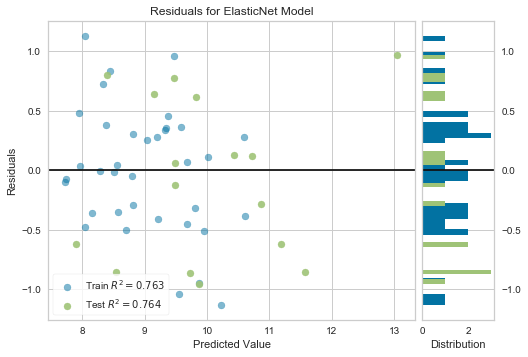

In [54]:
from yellowbrick.regressor import ResidualsPlot
e_net = ElasticNet(alpha=0.1, l1_ratio=0.2, random_state=7)
visualizer = ResidualsPlot(e_net)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   

In [62]:
e_net = ElasticNet(alpha=0.1, l1_ratio=0.2, random_state=7)
e_net.fit(X_train,y_train)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=7, selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
to = pd.DataFrame(y)
to['pred']=pred_x

In [98]:
to['pred']=pred_x

In [110]:
to['diff']=to.pred - to.stud_fee

In [103]:
np.exp(11.35)

84965.45150791103

In [105]:
np.exp(10.219140)

27423.072497679572

In [106]:
to = to.apply(np.exp)

In [113]:
to['perc_diff'] = ((to.pred - to.stud_fee)/to.stud_fee)*100

## Survival analysis check out

In [115]:
to.sort_values(by='perc_diff', ascending=False)

,stud_fee,pred,diff,perc_diff
Elusive Pimpernel,1000.0,3097.420874,2097.420874,209.742087
Frankel,175000.0,461915.029524,286915.029524,163.951445
Mount Nelson,5000.0,13045.883436,8045.883436,160.917669
Pastoral Pursuits,2000.0,4618.817206,2618.817206,130.940860
Haatef,2000.0,4443.009109,2443.009109,122.150455
Poet's Voice,6000.0,12996.513282,6996.513282,116.608555
Passing Glance,2000.0,4141.897610,2141.897610,107.094880
Pour Moi,5000.0,9456.763504,4456.763504,89.135270
Raven's Pass,10000.0,18590.064397,8590.064397,85.900644
Indian Haven,1750.0,2823.998084,1073.998084,61.371319


In [163]:
to2 = pd.DataFrame(y)
to2['pred']=pred_x
to2

,stud_fee,pred
Elusive Pimpernel,6.907755,8.038325
Dandy Man,9.210340,8.704552
Footstepsinthesand,9.210340,9.578135
Raven's Pass,9.210340,9.830383
Tamayuz,9.433484,9.491437
Sea The Stars,11.813030,11.192150
Holy Roman Emperor,9.615805,9.489864
Lawman,9.615805,9.209600
Haatef,7.600902,8.399087
Mastercraftsman,10.126631,9.678252


In [174]:
feature_n

array(['Flat_wi', 'Turf_wi', 'All-wea', 'Jumps_w', 'Hurdles', '2_win_r',
       '5-6f_wi', '7-9f_wi', '10-11f_', 'Heavy_w', 'Soft_wi', 'Gd-sft_',
       'Good_wi', 'Gd-fm_w', 'age', 'total_s', 'total_e', 'top_rpr',
       'Flat_ea', 'Turf_ea', 'All-wea', 'Jumps_e', 'Hurdles', '2_earni',
       '5-6f_ea', '7-9f_ea', '10-11f_', 'Heavy_e', 'Soft_ea', 'Gd-sft_',
       'Good_ea', 'Gd-fm_e'], dtype='<U7')

In [166]:
import lime
import lime.lime_tabular

# function requires train data to be 2D numpy array
X_lime = np.array(X)

# define feature names
feature_n=np.array(X.columns).astype('<U7')

# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_lime, 
                                                   mode = 'regression',
                                                   feature_names = feature_n)


exp = explainer.explain_instance(data_row = X_lime[-18], 
                                 predict_fn = e_net.predict)
exp.show_in_notebook()

In [169]:
exp = explainer.explain_instance(data_row = X_lime[8], 
                                 predict_fn = e_net.predict)
exp.show_in_notebook()

In [88]:
pred_x=e_net.predict(X)

In [61]:
np.exp(12)

162754.79141900392

the best params for elastic_net are: {'alpha': 0.1, 'l1_ratio': 0.0}
the best params for extra_trees are: {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
the best params for ridge are: {'alpha': 1.7782794100389228}
the best params for random_forest are: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
the best params for gradient are: {'learning_rate': 0.1, 'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 50}


,rmse,R_squared
elastic_net,0.793706,0.712743
extra_trees,0.862103,0.661101
ridge,0.830856,0.685223
random_forest,0.89328,0.636147
gradient,0.828756,0.686812
Baseline,1.48436,0


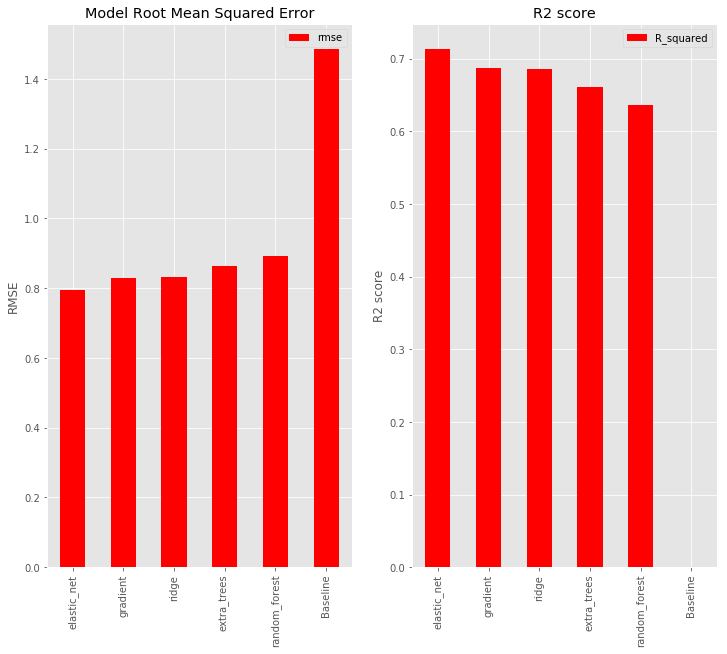

In [123]:
full_result = model_selection(X_train, X_test, y_train, y_test)
full_result

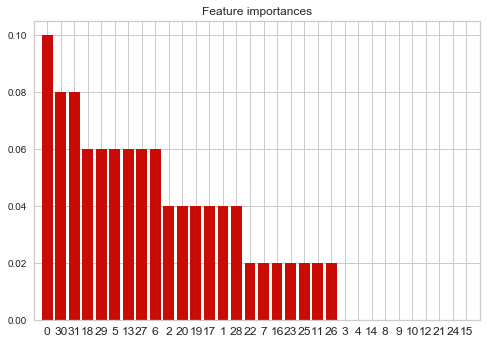

,features,importance
0,Flat_win_runners,0.10
30,Good_earningsp_run,0.08
31,Gd-fm_earningsp_run,0.08
5,2_win_runners,0.06
6,5-6f_win_runners,0.06
29,Gd-sft_earningsp_run,0.06
27,Heavy_earningsp_run,0.06
13,Gd-fm_win_runners,0.06
18,Flat_earningsp_run,0.06
17,top_rpr,0.04


In [173]:
grad = GradientBoostingRegressor(n_estimators=50, 
                               max_depth=1, 
                               max_features=3, 
                               min_samples_leaf=3, 
                               learning_rate=0.1,
                               random_state=7)

grad.fit(X_train, y_train)
importances = grad.feature_importances_
#std = np.std([tree.feature_importances_ for tree in grad.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices, size=12)
plt.xlim([-1, X_train.shape[1]])
plt.show()

feat=list(X)
feat_dict={'features':feat,
          'importance':importances}

feat_data = pd.DataFrame.from_dict(feat_dict)
feat_data = feat_data.sort_values(by='importance', ascending=False)
feat_data[:20]

In [48]:
import statsmodels.api as sm

X = df1[['Flat_earningsp_run']]
y = df1["log_stud_fee"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_stud_fee   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 07 Nov 2018   Prob (F-statistic):           1.47e-14
Time:                        08:52:47   Log-Likelihood:                -153.35
No. Observations:                  50   AIC:                             308.7
Df Residuals:                      49   BIC:                             310.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Flat_earningsp_run     0.0031      0.000     10.800      0.000       0.002       0.004
==============================================================================
Omnibus:                       57.088   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.023
Skew:                          -3.074   Prob(JB):                     4.78e-68
Kurtosis:                      13.536   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
df2['log_top_rpr'] = np.log(df2.top_rpr)
df2['log_stud_fee'] = np.log(df2.stud_fee)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df2['log_stud_fee'] = np.log(df2.stud_fee)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


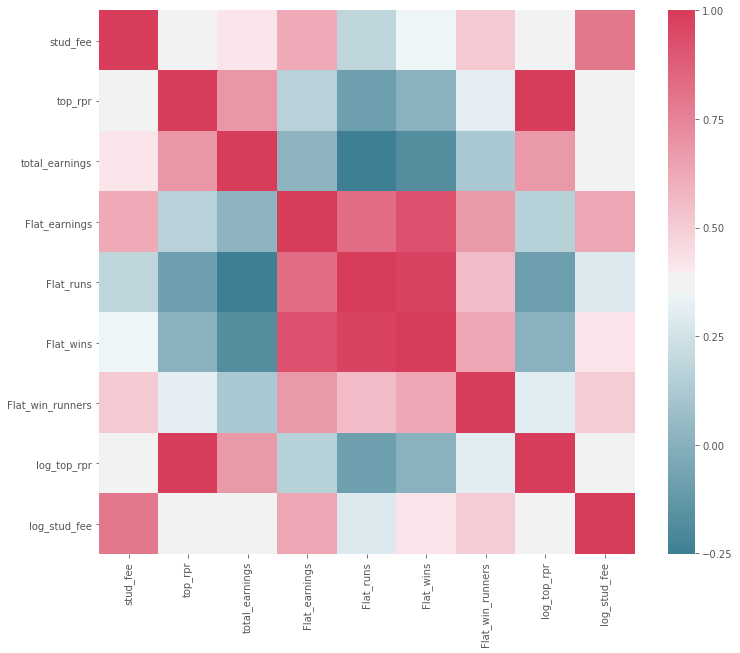

In [82]:
correlations=df2.corr()
correlations.head()

cmap = sns.diverging_palette(220, 5, as_cmap=True)

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlations, cmap=cmap)

In [1]:
sns.regplot(x='log_total_earnings', y='top_rpr', data=df2)

NameError: name 'sns' is not defined